<a href="https://colab.research.google.com/github/Vaniotosta/EDA-ANALISE-EXPLORATORIA-CHURN-DE-CLIENTES-DE-CARTAO-DE-CREDITO/blob/main/EDA_an%C3%A1lise_de_churn_de_carta%C3%A3o__de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA- ANÁLISE EXPLORATÓRIA DE CHURN DE CLIENTES DE CARTÃO DE CRÉDITO

In [162]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [163]:
import plotly


In [164]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [165]:
pio.renderers.default = "png" # visualizar em outra IDE

## PROBLEMA DE NEGÓCIO


Desafio:
Você trabalha em uma grande empresa de Cartão de Crédito e o diretor da empresa percebeu que o número de clientes que cancelam seus cartões tem aumentado significativamente, causando prejuízos enormes para a empresa

O que fazer para evitar isso? Como saber as pessoas que têm maior tendência a cancelar o cartão?

O que temos:
Temos 1 base de dados com informações dos clientes, tanto clientes atuais quanto clientes que cancelaram o cartão

Download da Base de Dados: Botão na página

Referência: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## OBJETIVO:
Identificar os possíveis motivos para evasão de clientes (Churn) usuário de cartão de créditos

In [166]:
 pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Informações da base

Temos 1 base de dados com informações dos clientes, tanto clientes atuais quanto clientes que cancelaram o cartão

Download da Base de Dados: Botão na página

Referência: https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
# Importando a  base de dados e dropando a variável cliente
import pandas as pd

tabela = pd.read_csv("/content/drive/MyDrive/base_banco_credito/ClientesBanco.csv", encoding="latin1")
tabela = tabela.drop("CLIENTNUM", axis=1)
tabela

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1335.000,1144,42,1625.000,0.061
1,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1541.000,1291,33,3714.000,0.105
2,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2594.000,1887,20,2333.000,0.000
3,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1405.000,1171,20,2333.000,0.760
4,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2175.000,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Cliente,50,M,2,Ensino Superior,Solteiro,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Cancelado,41,M,2,Não informado,Divorciado,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Cancelado,44,F,1,Ensino Médio,Casado,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Cancelado,30,M,2,Ensino Superior,Não informado,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Verificou que não temos mais valores nulos

In [169]:

tabela.isnull().sum()     # Verificando os valores nulos 
tabela=tabela.dropna()    # excluindo valores nulos


tabela.info()             # verificando as informações


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10126 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Categoria                      10126 non-null  object 
 1   Idade                          10126 non-null  int64  
 2   Sexo                           10126 non-null  object 
 3   Dependentes                    10126 non-null  int64  
 4   Educação                       10126 non-null  object 
 5   Estado Civil                   10126 non-null  object 
 6   Faixa Salarial Anual           10126 non-null  object 
 7   Categoria Cartão               10126 non-null  object 
 8   Meses como Cliente             10126 non-null  int64  
 9   Produtos Contratados           10126 non-null  int64  
 10  Inatividade 12m                10126 non-null  int64  
 11  Contatos 12m                   10126 non-null  int64  
 12  Limite                         10126 non-null 

In [170]:
tabela.describe()  # Verificando principais estatistica

,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
count,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000,10126.000000
mean,46.327079,2.346139,35.928995,3.812463,2.341300,2.455264,8631.962088,1162.764369,7469.197719,108.713167,4404.391764,64.861841,66.579995,0.274901
std,8.016420,1.298956,7.986593,1.554440,1.010584,1.106267,9089.225428,815.012238,9091.132356,353.912795,3397.157925,23.471594,284.001363,0.275704
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,358.000000,1324.250000,0.631000,2156.000000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3473.000000,0.736000,3899.500000,67.000000,0.702000,0.175500
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.750000,1784.000000,9860.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3397.000000,18484.000000,139.000000,3714.000000,0.999000



1 Verificou-se que a idade varia de 26 a 73 anos , e que 50 % dos clientes estão acima dos 46 anos.

2 Mais da metade ds clientes  tem acima de 2 dependendes

3 Mais da metade dos clientes estão acima de 36 meses ativos

4 Mais da metade dos clientes tem limite acima de 4500

## Vamos avaliar como está a divisão entre Clientes x Cancelados

In [171]:
qtde_categoria = tabela["Categoria"].value_counts()
display(qtde_categoria)


qtde_categoria_perc =( tabela["Categoria"].value_counts(normalize=True)*100) # qtd em percentuais
display(qtde_categoria_perc)

Cliente      8499
Cancelado    1627
Name: Categoria, dtype: int64

Cliente      83.932451
Cancelado    16.067549
Name: Categoria, dtype: float64

## Vamos descobrir alguns possíveis motivos do cancelamento

  - Podemos olhar a comparação entre Clientes e Cancelados em cada uma das colunas da nossa base de dados, para ver se essa informação traz algum insight novo para a gente

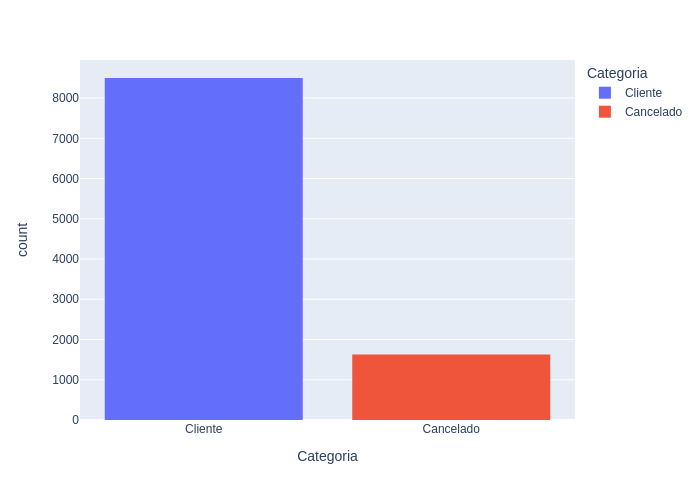

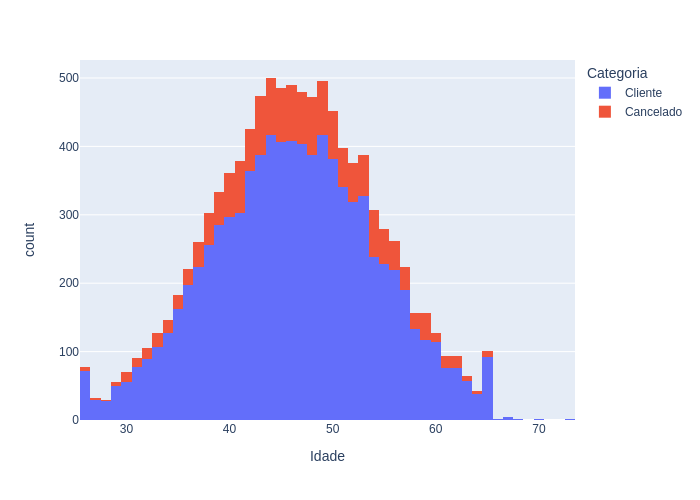

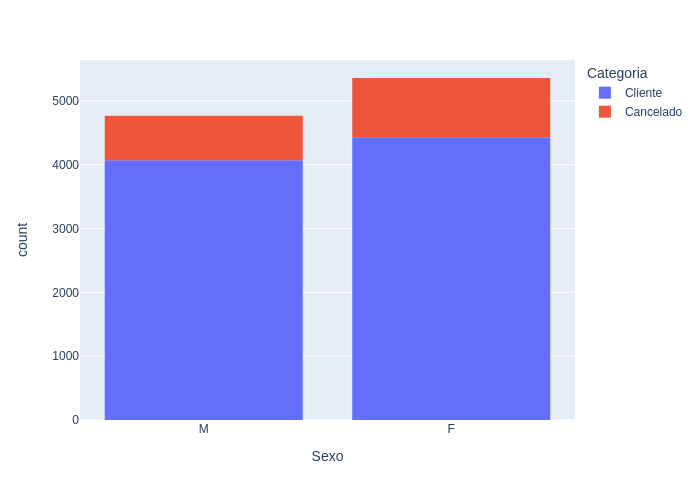

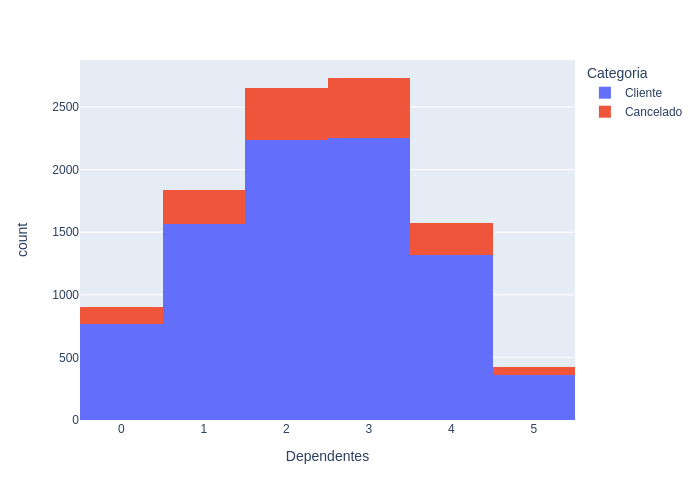

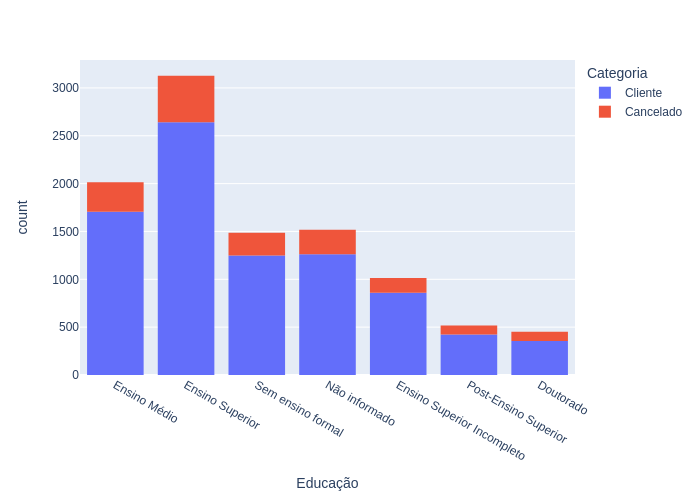

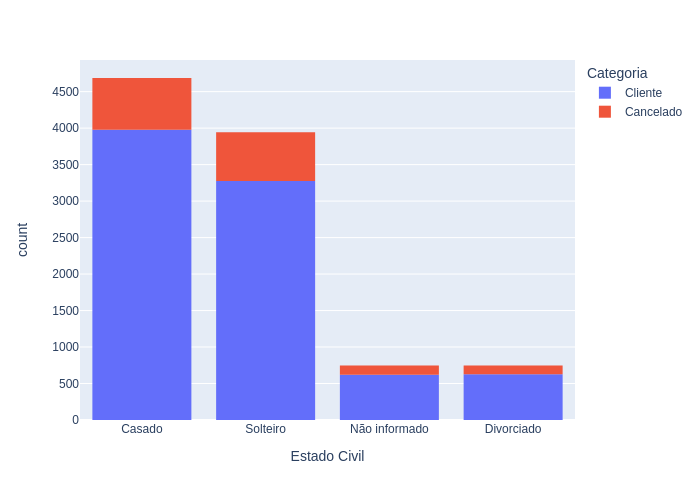

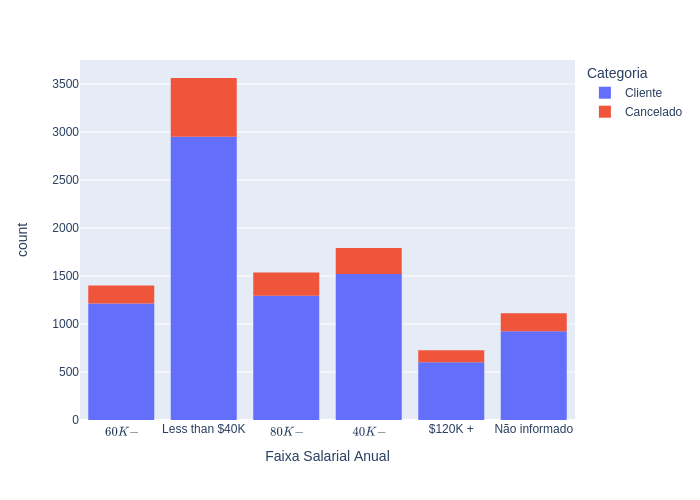

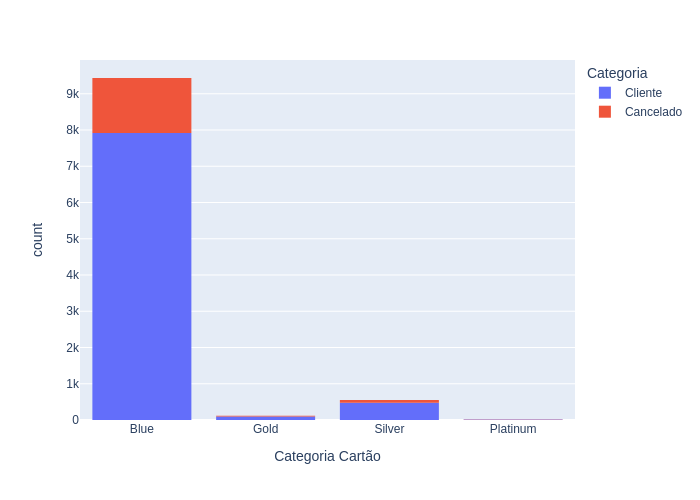

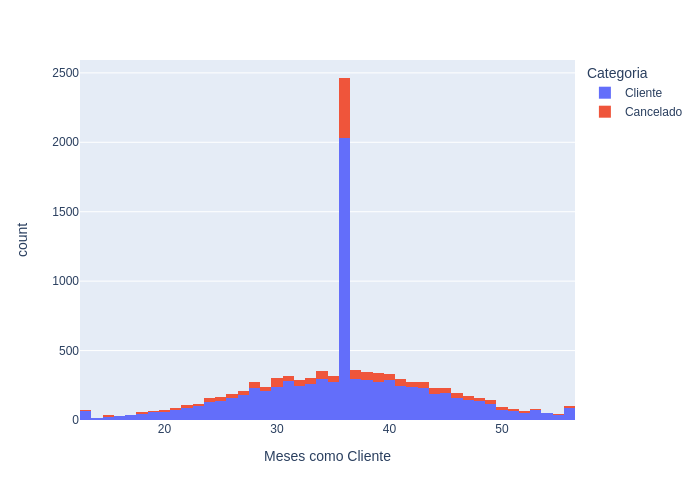

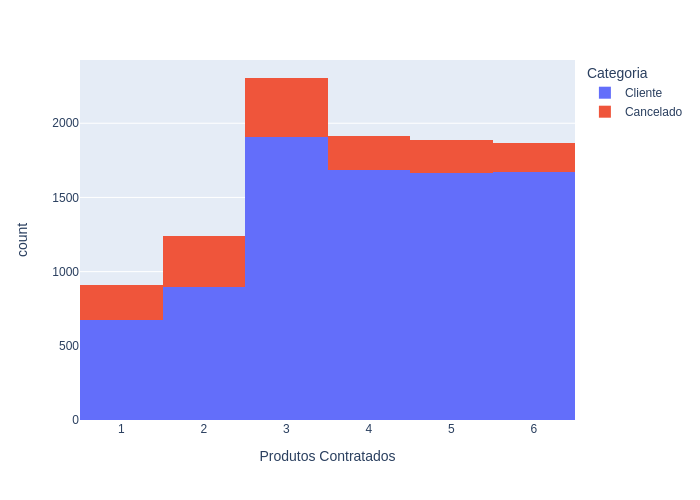

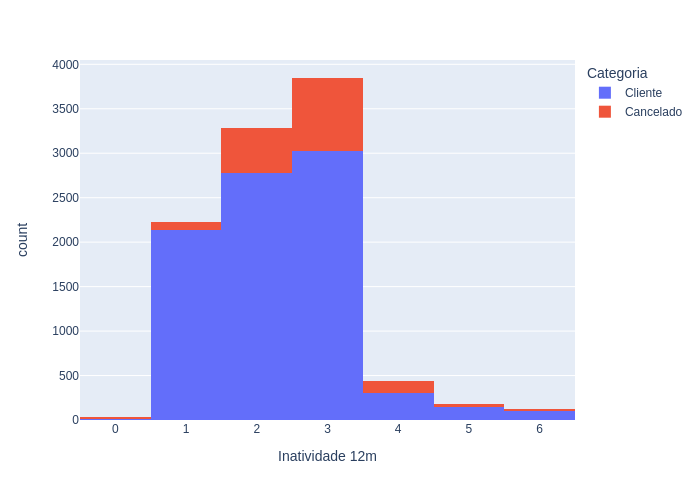

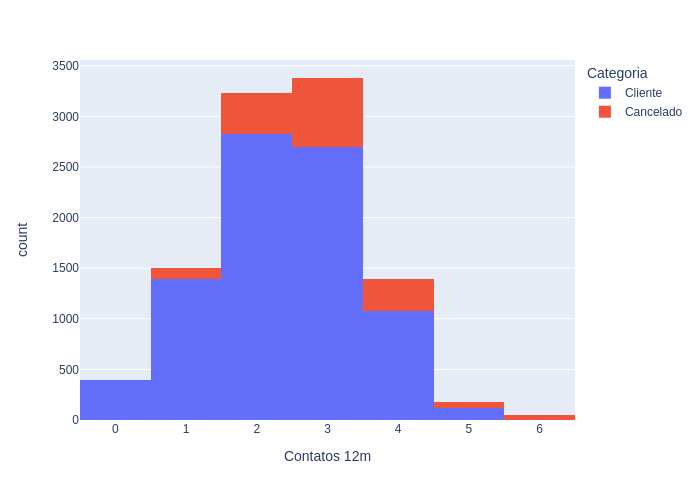

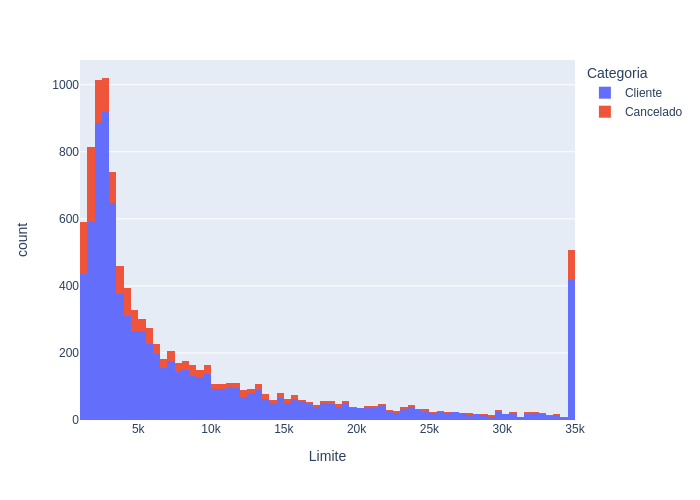

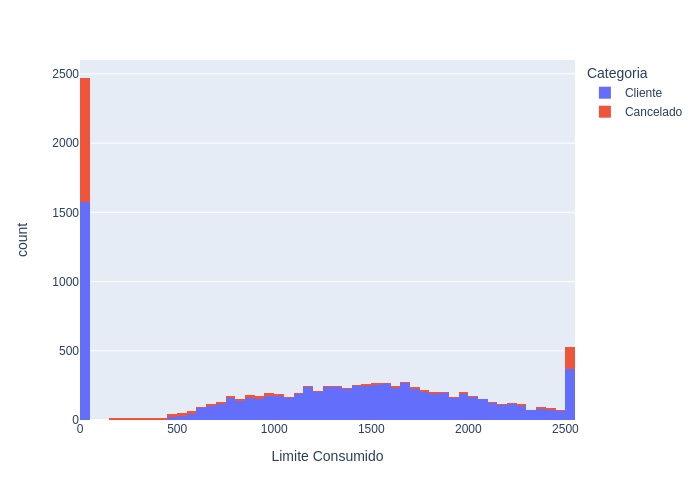

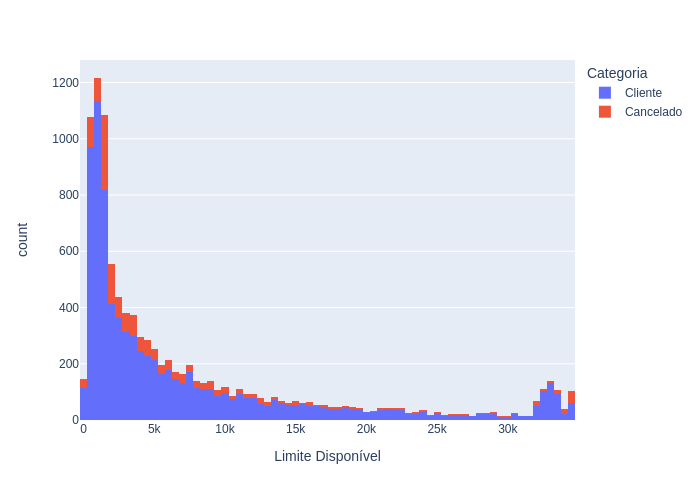

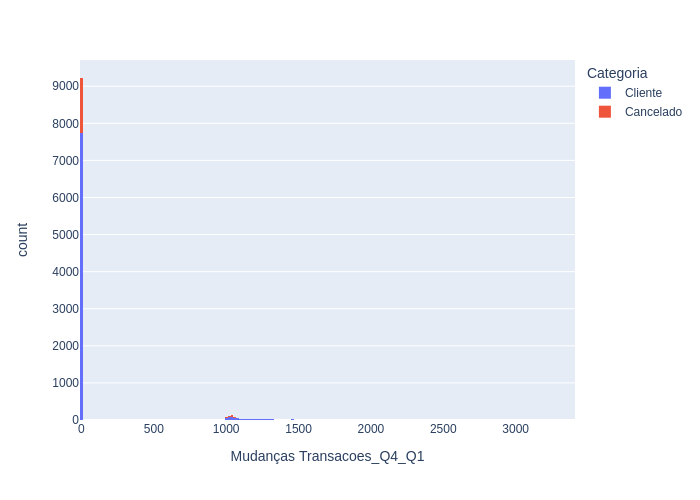

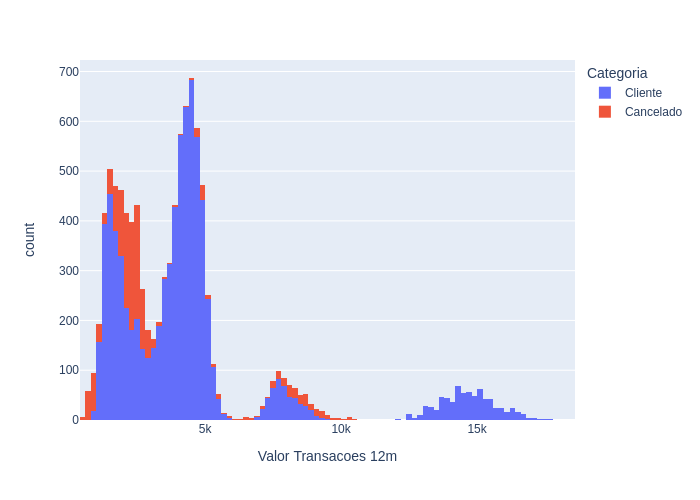

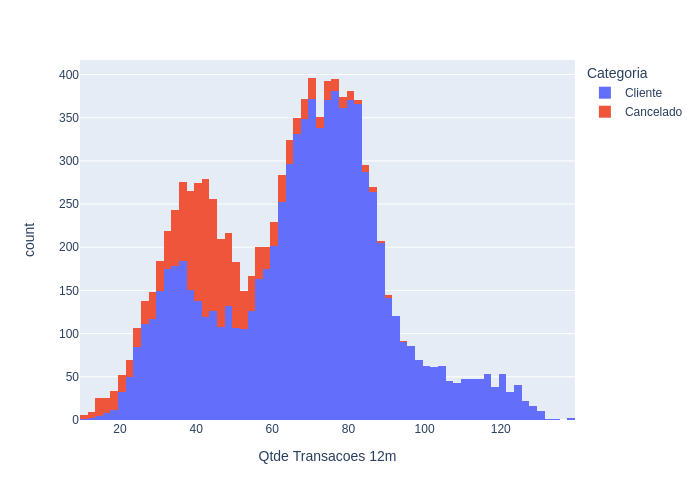

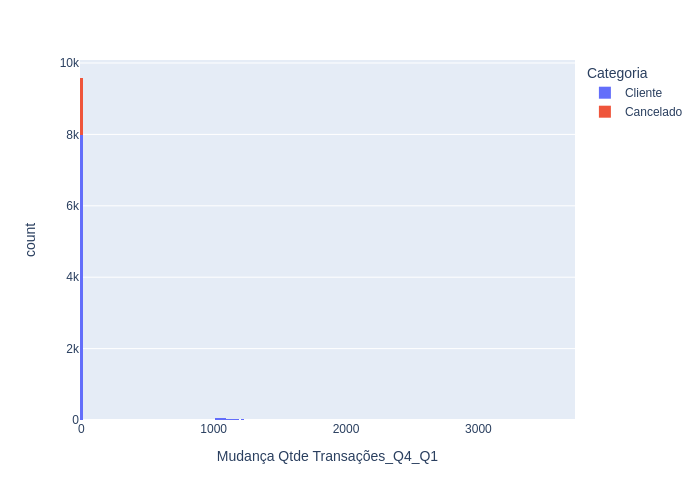

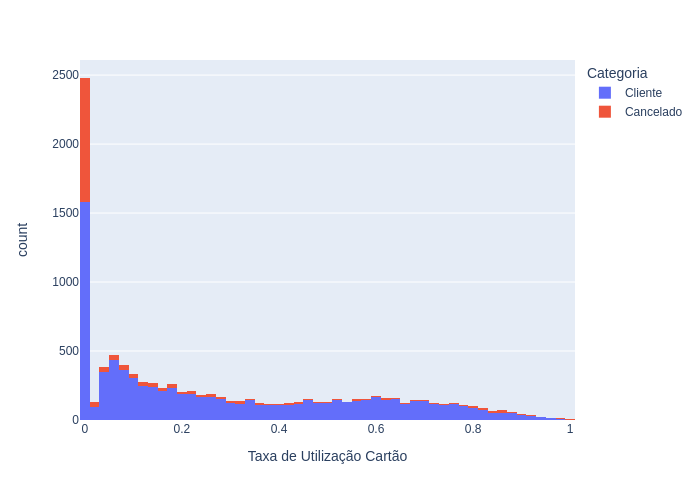

In [172]:
import plotly.express as px

for coluna in tabela:
  grafico = px.histogram(tabela, x=coluna, color="Categoria")
  grafico.show()
  

In [173]:
tabela.mean() # verificando a média das variáveis

<ipython-input-173-495a839282b1>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Idade                              46.327079
Dependentes                         2.346139
Meses como Cliente                 35.928995
Produtos Contratados                3.812463
Inatividade 12m                     2.341300
Contatos 12m                        2.455264
Limite                           8631.962088
Limite Consumido                 1162.764369
Limite Disponível                7469.197719
Mudanças Transacoes_Q4_Q1         108.713167
Valor Transacoes 12m             4404.391764
Qtde Transacoes 12m                64.861841
Mudança Qtde Transações_Q4_Q1      66.579995
Taxa de Utilização Cartão           0.274901
dtype: float64

In [174]:
# Verificando o percentual agregado
tabela.groupby(["Categoria Cartão", "Sexo"])["Estado Civil"].value_counts(normalize=True).mul(100)



Categoria Cartão  Sexo  Estado Civil 
Blue              F     Casado           46.324250
                        Solteiro         39.266810
                        Divorciado        7.469124
                        Não informado     6.939816
                  M     Casado           47.761883
                        Solteiro         37.401938
                        Não informado     7.568066
                        Divorciado        7.268113
Gold              F     Solteiro         60.526316
                        Casado           26.315789
                        Não informado     7.894737
                        Divorciado        5.263158
                  M     Solteiro         44.871795
                        Casado           39.743590
                        Não informado    11.538462
                        Divorciado        3.846154
Platinum          F     Solteiro         77.777778
                        Casado           11.111111
                        Divorciado       11.

### PRINCIPAIS INSIGHTS

1 16% dos clientes cancelaram o cartão

2 A idade crítica de cancelamento se concentra entre 40 a 55 anos,salientando que a média de idade é 46 anos, porém é preciso estar atento as outras faixas de idade e tanto faz se for homem ou mulher

3 A quantidade de dependentes não tem relação direta com os cancelamentos, porém é necessário um olhar atento aos que tem 2 a 3 dependentes

4 A faixa salarial anual abaixo de 40k foi a que mais impactou nos cancelamentos

5 O tipo de cartão que teve influência foi o blue, talvez seja por ser um tipo de cartão popular

6 Os clientes de 36 meses com cartão foram os que mais cancelaram 

7 A maior inatividade no período de 1 ano do cartão se concentra entre a faixa 2 e 3



8 O limite do cartão de que se concetram os cancelamentos estão abaixo dos 5k, deve ser indícios de faixas populares, e quem usa o limite do cartão tem poucos cancelamentos, limites baixos de cartão favorece o cancelamento.

9.Existem muitos cartão sem transações e pouco uso do limite do cartão.

10 Os cancelamentos se concentram entre valores de transações de 2k a 4k no período de 12 meses, e quantidades de transações de 40 a 55 trasanções por ano.

# RESUMO DOS INFLUENCIADORES 

- LIMITE DE CARTÃO BAIXO 5K
- POUCO USO DO LIIMITE
- BANDEIRA DO CARTÃO
- VALORE E QUANTIDADES BAIXOS DE TRANSAÇÕES
- IDADE  ENTRE 40 E 55 ANOS